In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [22]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [23]:
assets = pkg.reference('assets').dataframe()
locations = pkg.reference('locations').dataframe()
prk = pkg.reference('parking_events').dataframe()

prk.columns  = [e.lower() for e in prk.columns]


In [148]:
len(locations)

6616

In [34]:
prk_loc = prk.merge(locations, on='locationuid')

In [95]:
df = prk_loc[prk_loc.community_name == 'Downtown'].copy()

In [112]:
df.community_name.value_counts()

Downtown    9477418
Name: community_name, dtype: int64

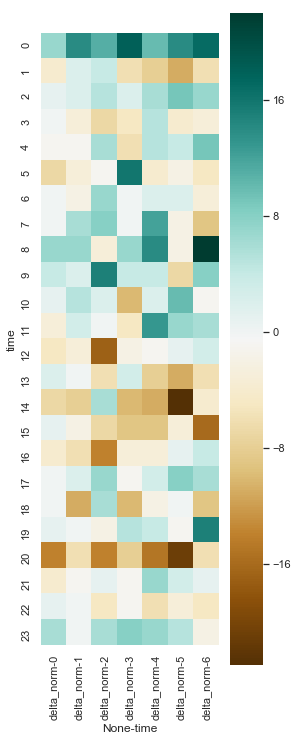

In [75]:
t = df[df.locationuid == 'ngxb22vyhqcjksjde40'].groupby([df.time.dt.hour, df.time.dt.weekday]).sum()
fig, ax = plt.subplots(figsize=(4, 12)) 
sns.heatmap(t[['delta_norm']].unstack(), ax=ax,  square=True, cmap="BrBG")

In [134]:
df['month'] = df.time.apply( lambda v: v.date().replace(day=15))
df.head()

,time,locationuid,delta,cs,delta_norm,cs_norm,locationtype,parentlocationuid,community_name,tract_geoid,roadsegid,speed,oneway,abloaddr,abhiaddr,rd30full,geometry,flow,month
0,2018-09-01 12:30:00,v645089nhwojixbldr0,-1,-1,0,4,PARKING_ZONE,v645089nhwojixbldr0,Downtown,14000US00000006937,38442.0,20.0,B,1100.0,1199.0,J ST,POLYGON ((-117.1539287914682 32.70946929697975...,0,2018-09-15
1,2018-09-01 12:45:00,v645089nhwojixbldr0,0,-1,0,4,PARKING_ZONE,v645089nhwojixbldr0,Downtown,14000US00000006937,38442.0,20.0,B,1100.0,1199.0,J ST,POLYGON ((-117.1539287914682 32.70946929697975...,0,2018-09-15
2,2018-09-01 13:00:00,v645089nhwojixbldr0,0,-1,0,4,PARKING_ZONE,v645089nhwojixbldr0,Downtown,14000US00000006937,38442.0,20.0,B,1100.0,1199.0,J ST,POLYGON ((-117.1539287914682 32.70946929697975...,0,2018-09-15
3,2018-09-01 13:15:00,v645089nhwojixbldr0,2,1,2,6,PARKING_ZONE,v645089nhwojixbldr0,Downtown,14000US00000006937,38442.0,20.0,B,1100.0,1199.0,J ST,POLYGON ((-117.1539287914682 32.70946929697975...,1,2018-09-15
4,2018-09-01 13:30:00,v645089nhwojixbldr0,-2,-1,-2,4,PARKING_ZONE,v645089nhwojixbldr0,Downtown,14000US00000006937,38442.0,20.0,B,1100.0,1199.0,J ST,POLYGON ((-117.1539287914682 32.70946929697975...,-1,2018-09-15


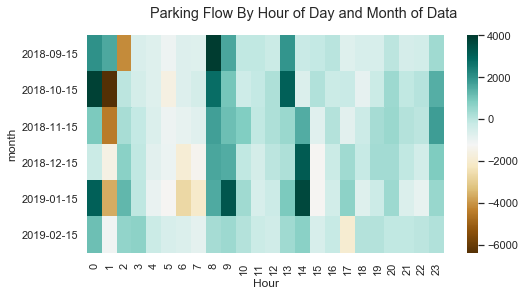

In [147]:

from matplotlib.pyplot import xticks, xlabel, suptitle
t = df.groupby([df.month, df.time.dt.hour]).sum()
fig, ax = plt.subplots(figsize=(8, 4)) 
ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap="BrBG");
locs, labels = xticks()
xticks(locs, [ f'{e}' for e in range(24)]);
xlabel("Hour");
suptitle("Parking Flow By Hour of Day and Month of Data");

<a list of 24 Text xticklabel objects>

In [98]:
df['flow'] = df.delta_norm.apply( lambda v : 0 if abs(v) < 2 else 1 if v > 0 else -1  )

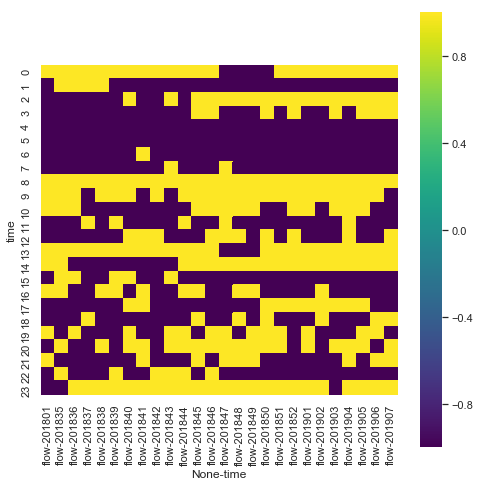

In [122]:
t = df.groupby([df.time.dt.hour, df.time.dt.week+(df.time.dt.year*100)]).sum().copy()
t['flow'] = t.delta_norm.apply( lambda v : 1 if v > 0 else -1  )
fig, ax = plt.subplots(figsize=(8, 8)) 
sns.heatmap(t[['flow']].unstack(), ax=ax,  square=True, cmap="viridis")

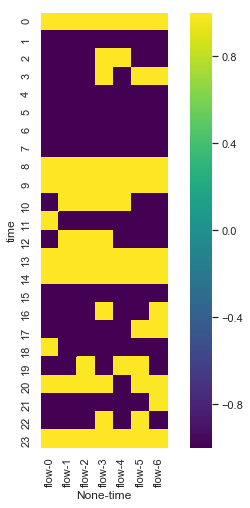

In [121]:
t = df.groupby([df.time.dt.hour, df.time.dt.dayofweek]).sum().copy()
t['flow'] = t.delta_norm.apply( lambda v : 1 if v > 0 else -1  )
fig, ax = plt.subplots(figsize=(8, 8)) 
sns.heatmap(t[['flow']].unstack(), ax=ax,  square=True, cmap="viridis")